In [1]:
# Import some necessary libraries
import numpy as np 
import os
import pandas as pd 
from matplotlib import pyplot as plt 

In [2]:
# Declare some variables about the paths and files
data_dir = "D:\\FGW\\GDRIVE\\My BI\\Data"
excel_name = "Gold_price_forecast.xlsx"
#excel_path = data_dir + "\\" + excel_name
excel_path = os.path.join(data_dir, excel_name)

In [6]:
# Read the excel file to a dataframe
excel_df = pd.read_excel(excel_path, usecols=["Date", "Price (USD)"])

In [7]:
# examine the dataframe ()
excel_df

,Date,Price (USD)
0,1950-01,34.730
1,1950-02,34.730
2,1950-03,34.730
3,1950-04,34.730
4,1950-05,34.730
...,...,...
842,2020-03,1593.764
843,2020-04,1680.030
844,2020-05,1715.697
845,2020-06,1734.032


In [19]:
# define the function for moving average method
def mov_average(num_steps, in_array):
    '''
    num_steps : number of historical steps, integer type
    in_array : input array, this must be numpy array or dataframe
    '''
    # declare the output list, a list type
    out_list = list(in_array[:num_steps])
    # the loop to calculate the output, average of historical steps
    for i in range(num_steps, len(in_array)):
        predict = in_array[i-num_steps : i].sum()/num_steps
        out_list.append(predict)
        
    return out_list
        

In [20]:
input_array = excel_df["Price (USD)"]

In [21]:
num_steps = 5
# create the predict data 
predict_list = mov_average(num_steps, input_array)

In [23]:
len(predict_list)


847

In [24]:
# bring the predic list into dataframe df["name colums"] = list
excel_df["Moving Average"] = predict_list

In [25]:
excel_df

,Date,Price (USD),Moving Average
0,1950-01,34.730,34.7300
1,1950-02,34.730,34.7300
2,1950-03,34.730,34.7300
3,1950-04,34.730,34.7300
4,1950-05,34.730,34.7300
...,...,...,...
842,2020-03,1593.764,1521.2394
843,2020-04,1680.030,1541.0392
844,2020-05,1715.697,1582.6610
845,2020-06,1734.032,1629.7954


<AxesSubplot:>

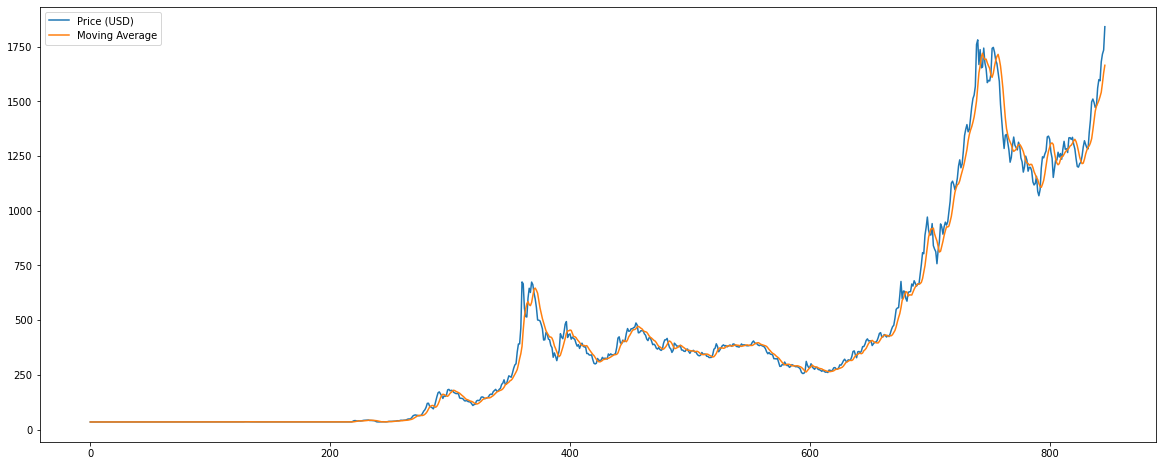

In [29]:
#plot the dataframe 
#excel_df.plot(kind="line", figsize = (20,8))
excel_df.plot.line(figsize = (20,8))

In [46]:
# Define the linear regression function
def linear_predict(x_predict, y_known, x_known):
    """
    x_predict: a value will be inputted for forecasting 
    y_known, x_known : array type, historical data
    """
    def average(array):
        return array.sum()/len(array)
    x_avg = average(x_known)
    y_avg = average(y_known)
    b_divisor = ((x_known - x_avg)*(y_known - y_avg)).sum()
    b_divident = ((x_known - x_avg)*(x_known - x_avg)).sum()
    b = b_divisor/b_divident
    a = y_avg - b*x_avg
    #y_predict = b*x_predict + a
    return b*x_predict + a

In [49]:
# define a function to generate for a time series data
def lin_regres(num_steps, in_array):
    '''
    num_steps : number of historical steps, integer type
    in_array : input array, this must be numpy array or dataframe
    '''
    # declare the output list, a list type
    out_list = list(in_array[:num_steps])
    # the loop to calculate the output, linear regression of historical steps
    x_array = np.array(range(1, len(in_array)+1))
    for i in range(num_steps, len(in_array)):
        x_predict = x_array[i]
        y_known = in_array[i - num_steps : i]
        x_known = x_array[i - num_steps : i]
        predict = linear_predict(x_predict, y_known, x_known)
        out_list.append(predict)
    
    return out_list

In [50]:
num_steps = 15
input_array = excel_df["Price (USD)"]
# create the predict data 
predict_list = lin_regres(num_steps, input_array)

In [52]:
# bring the predic list into dataframe df["name colums"] = list
excel_df["Linear Regression"] = predict_list

In [53]:
excel_df

,Date,Price (USD),Moving Average,Linear Regression
0,1950-01,34.730,34.7300,34.730000
1,1950-02,34.730,34.7300,34.730000
2,1950-03,34.730,34.7300,34.730000
3,1950-04,34.730,34.7300,34.730000
4,1950-05,34.730,34.7300,34.730000
...,...,...,...,...
842,2020-03,1593.764,1521.2394,1600.950971
843,2020-04,1680.030,1541.0392,1624.877305
844,2020-05,1715.697,1582.6610,1668.741238
845,2020-06,1734.032,1629.7954,1715.572800


<AxesSubplot:xlabel='Time', ylabel='USD'>

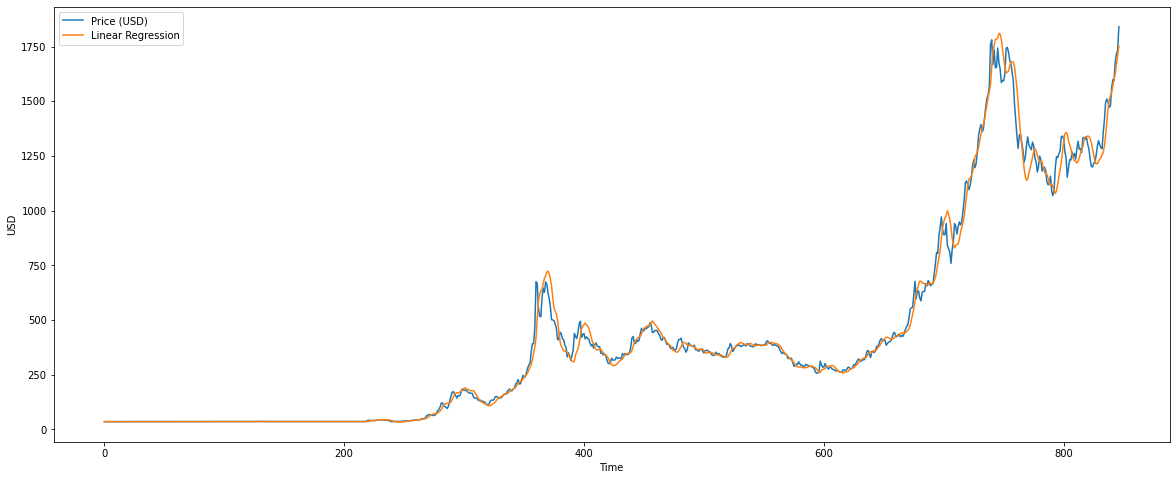

In [55]:
#plot the dataframe 
#excel_df.plot(kind="line", figsize = (20,8))
excel_df[["Date", "Price (USD)", "Linear Regression"]].plot(xlabel= "Time", ylabel="USD",figsize = (20,8))

In [56]:
# calculate the errors 
mov_avg_errors = excel_df["Moving Average"] - excel_df["Price (USD)"]

In [57]:
lin_reg_errors = excel_df["Linear Regression"] - excel_df["Price (USD)"]

In [59]:
excel_df["Error of MA"] = mov_avg_errors
excel_df["Error of LR"] = lin_reg_errors

In [60]:
excel_df

,Date,Price (USD),Moving Average,Linear Regression,Error of MA,Error of LR
0,1950-01,34.730,34.7300,34.730000,0.0000,0.000000
1,1950-02,34.730,34.7300,34.730000,0.0000,0.000000
2,1950-03,34.730,34.7300,34.730000,0.0000,0.000000
3,1950-04,34.730,34.7300,34.730000,0.0000,0.000000
4,1950-05,34.730,34.7300,34.730000,0.0000,0.000000
...,...,...,...,...,...,...
842,2020-03,1593.764,1521.2394,1600.950971,-72.5246,7.186971
843,2020-04,1680.030,1541.0392,1624.877305,-138.9908,-55.152695
844,2020-05,1715.697,1582.6610,1668.741238,-133.0360,-46.955762
845,2020-06,1734.032,1629.7954,1715.572800,-104.2366,-18.459200


<AxesSubplot:>

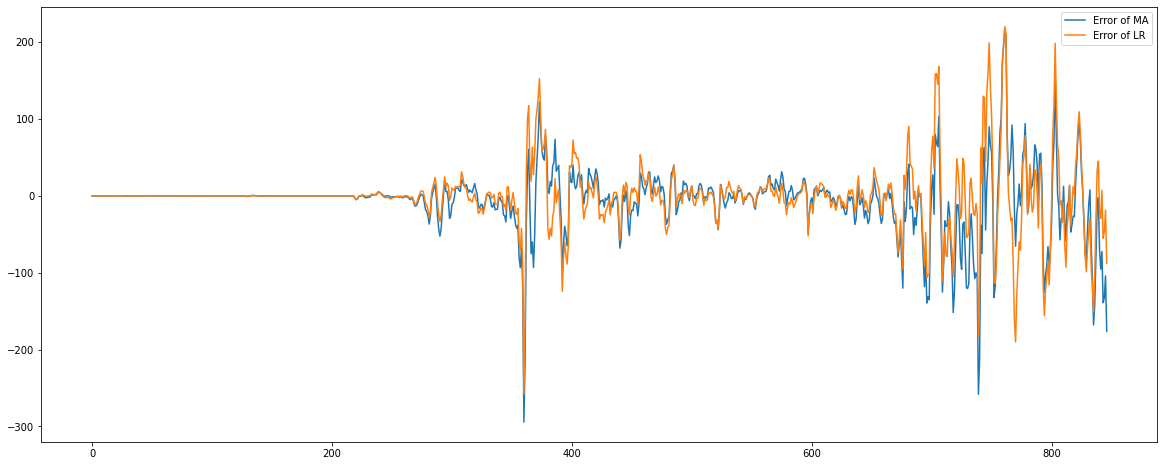

In [61]:
excel_df[["Date", "Error of MA", "Error of LR"]].plot(figsize = (20,8))

In [68]:
MA_max_loss = excel_df["Error of MA"].max()

In [69]:
LR_max_loss = excel_df["Error of LR"].max()

In [70]:
MA_min_loss = excel_df["Error of MA"].min()

In [71]:
LR_min_loss = excel_df["Error of LR"].min()

In [73]:
# average loss of Moving Average
MA_avg_loss = excel_df["Error of MA"].sum()/len(excel_df["Error of MA"])

In [74]:
# average loss of Linear Regression
LR_avg_loss = excel_df["Error of LR"].sum()/len(excel_df["Error of LR"])

In [75]:
dict_data = {"Points": ["max", "min", "average"],
             "Moving Average":[MA_max_loss, MA_min_loss, MA_avg_loss],
             "Linear Regression":[LR_max_loss, LR_min_loss, LR_avg_loss]
            }
compare = pd.DataFrame(dict_data)

In [76]:
compare

,Points,Moving Average,Linear Regression
0,max,216.42700,220.181714
1,min,-6.07323,-257.431876
2,average,-6.07323,-0.907546


<AxesSubplot:xlabel='Points'>

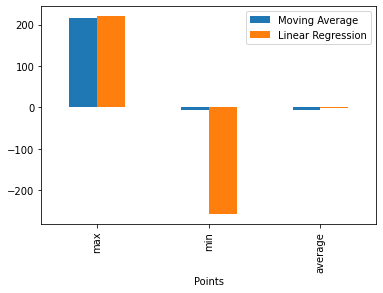

In [77]:
compare.plot.bar(x="Points", y=["Moving Average", "Linear Regression"])